In [2]:
from utils import get_off_data, get_signal_data, get_azimov_error
from utils import n_bins, Mfv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

/Users/olgarazuvaeva/.local/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


**Parameters of the data collection**

T_off -- livetime during reactor OFF period

T_on -- livetime during reactor ON period

Time periods are indicated in days.

In [3]:
T_off = 1
T_on = 3

**Nuclear recouil spectrum**

The differential nuclear recoil spectrum based on reactor antineutrion spectrum SM2018 is proposed as an example. It should have two columns ("T[keV]" and "spectrum"), where "spectrum" should represent count rate per day per 100 kg per keV.

In [4]:
spectrum = pd.read_csv('SM2018.csv')

**Loading necessary data**

In [5]:
bg_data = pd.read_csv('bg_data.csv')
table_data = pd.read_csv('table_data.csv')
table_data.columns = [table_data.columns[0]] + [float(col) for col in table_data.columns[1:]]

**Constructing signal and Azimov datasets**

Signal is multiplied by a coefficent of 100 in order to be more noticable in figures.

In [11]:
hist_data = pd.DataFrame()
hist_data['bin_center'] = bg_data['bin_center']
hist_data['OFF_counts'] = get_off_data(bg_data['OFF_1day'],T_off)
hist_data['azimov_error'] = get_azimov_error(bg_data['OFF_1day'], T_off, T_on)
hist_data['signal'] = 100*get_signal_data(table_data, spectrum, T_on)

**Drawing histograms**

(0.0, 19600.0)

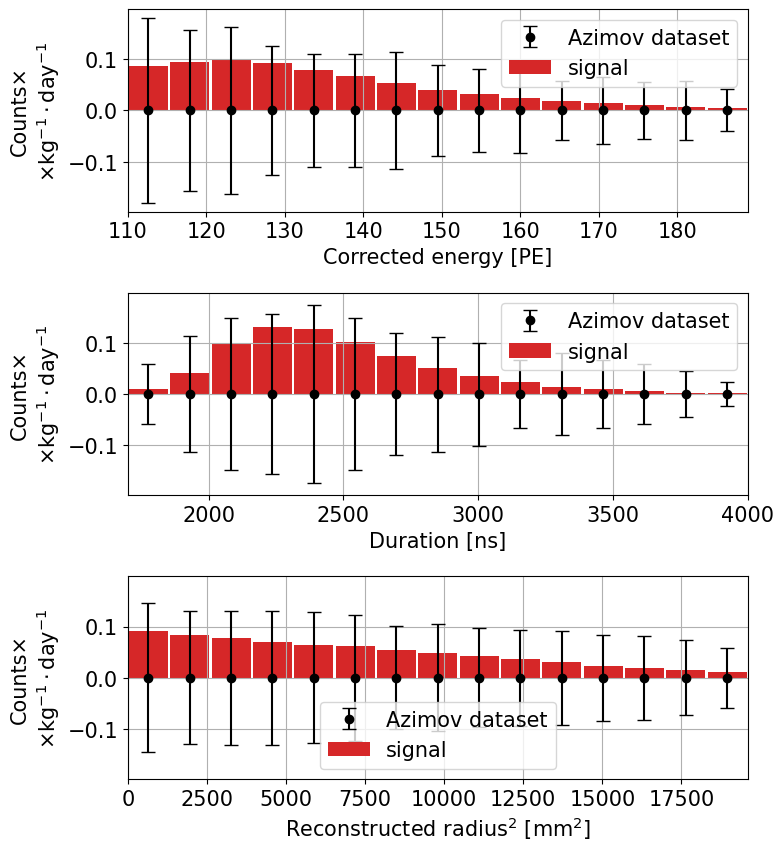

In [12]:
plt.rcParams.update({'font.size': 15})
fig = plt.figure(figsize = [8,10])
gs = fig.add_gridspec(3, hspace=0.4)
axs = gs.subplots(sharex=False, sharey=True)

left_bin = 0
right_bin = left_bin+n_bins
axs[0].set_ylim(-1.1*max(hist_data.azimov_error)/(Mfv*T_on), 1.1*max(hist_data.azimov_error)/(Mfv*T_on))
axs[0].grid()
axs[0].errorbar(hist_data[left_bin:right_bin].bin_center, np.zeros(n_bins),  (1/Mfv)*(1/T_on)*(hist_data.azimov_error[left_bin:right_bin]), fmt = 'o', capsize=5, color = 'black', label = 'Azimov dataset')
axs[0].bar(hist_data[left_bin:right_bin].bin_center, (1/Mfv)*(1/T_on)*hist_data[left_bin:right_bin].signal, label = 'signal', width = 0.95*(7-4.074)*27/15, color = 'C3')
axs[0].legend()
axs[0].set_xlabel('Corrected energy [PE]')
axs[0].set_ylabel('Counts×\n×kg$^{-1}\cdot$day$^{-1}$')
axs[0].set_xlim(110,189)

left_bin = n_bins
right_bin = left_bin+n_bins
axs[1].set_ylim(-1.1*max(hist_data.azimov_error)/(Mfv*T_on), 1.1*max(hist_data.azimov_error)/(Mfv*T_on))
axs[1].grid()
axs[1].errorbar(hist_data[left_bin:right_bin].bin_center, np.zeros(n_bins),  (1/Mfv)*(1/T_on)*(hist_data.azimov_error[left_bin:right_bin]), fmt = 'o', capsize=5, color = 'black', label = 'Azimov dataset')
axs[1].bar(hist_data[left_bin:right_bin].bin_center, (1/Mfv)*(1/T_on)*hist_data[left_bin:right_bin].signal, label = 'signal', width = 0.95*(4000-1700)/15, color = 'C3')
axs[1].legend()
axs[1].set_xlabel('Duration [ns]')
axs[1].set_ylabel('Counts×\n×kg$^{-1}\cdot$day$^{-1}$')
axs[1].set_xlim(1700,4000)

left_bin = 2*n_bins
right_bin = left_bin+n_bins
axs[2].set_ylim(-1.1*max(hist_data.azimov_error)/(Mfv*T_on), 1.1*max(hist_data.azimov_error)/(Mfv*T_on))
axs[2].grid()
axs[2].errorbar(hist_data[left_bin:right_bin].bin_center, np.zeros(n_bins),  (1/Mfv)*(1/T_on)*(hist_data.azimov_error[left_bin:right_bin]), fmt = 'o', capsize=5, color = 'black', label = 'Azimov dataset')
axs[2].bar(hist_data[left_bin:right_bin].bin_center, (1/Mfv)*(1/T_on)*hist_data[left_bin:right_bin].signal, label = 'signal', width = 0.95*(140**2)/15, color = 'C3')
axs[2].legend()
axs[2].set_xlabel('Reconstructed radius$^2$ [mm$^2$]')
axs[2].set_ylabel('Counts×\n×kg$^{-1}\cdot$day$^{-1}$')
axs[2].set_xlim(0,140**2)